### This notebook examines planar four-link arm with the Robotics Toolbox (RTB) for Python - Update1. ###

In [1]:
""" Matplotlib imports
"""
import matplotlib
matplotlib.use('Qt4Agg')
get_ipython().run_line_magic('matplotlib', 'notebook')
import matplotlib.pyplot as plt  # needed to get current figure number using plt.gcf().number
from matplotlib import rc        # needed to set Matplotlib animation._repr_html_()
from PIL import Image            # needed to open images created by the RTB for MATLAB Octave variant

rc('animation', html='jshtml')   # Matplotlib animations will be HTML wrapped JavaScript

In [2]:
""" RBT for Python robot imports
"""
import _robot                   # use helper script to locate local RTB for Python robot module
from robot.plot import *        # needed to access robot plot module globals (i.e., rbplotAnims2D)
from robot.trajectory import *  # needed for ctraj() function
from robot.kinematics import *  # needed for fkine() and ikine() functions
from robot.fourlink2d import *  # needed for planar four-link arm model data

Using Robotics Toolbox module /home/garyd/PycharmProjects/robotics-toolbox-python/notebooks/kinematic2d/../../robot
Creating a planar four-link arm as fl2d


The inverse kinematic function ikine() checks the condition of the Jacobian matrix for the initial joint space vector, that of the nominal pose in this case, for singularity. The condition computation may result in a division by zero runtime warning message. This warning is elevated to an error, caught and displayed with a stack trace as an informative notice. The inverse kinematic iteration processing will continue under advisement of potential slow convergence.

In [3]:
# Utilize forward and inverse kinematic functions to create a joint space trajectory 'Qik', from
# nominal pose to targeted pose, for the planar four-link arm.
t = arange(0.0, 4.1, 0.1);   # create a time vector
T0 = fkine(fl2d, qn)
T1 = fkine(fl2d, qt)
Traj = ctraj(T0, T1, len(t))
Qik = ikine(fl2d, Traj, q0=qn, m=[1,1,1,1,0,0], verbose=0)

Traceback (most recent call last):
  File "/home/garyd/PycharmProjects/robotics-toolbox-python/notebooks/kinematic2d/../../robot/kinematics.py", line 163, in ikine
    condJ0 = cond(J0)
  File "/usr/lib/python3/dist-packages/numpy/linalg/linalg.py", line 1457, in cond
    return s[..., 0]/s[..., -1]


RTB:ikine:singular: Initial joint configuration results in a (near-)singular configuration;
                    this may slow convergence.


Run the same case using the RTB for MATLAB Octave variant to create and save plots for comparison with RTB for Python.

In [4]:
import os.path
if not os.path.isfile("./octave_ikine2d_plot.jpg"):
    from os import system
    system("/usr/bin/octave ./octave_kine2d.m")

<IPython.core.display.Javascript object>


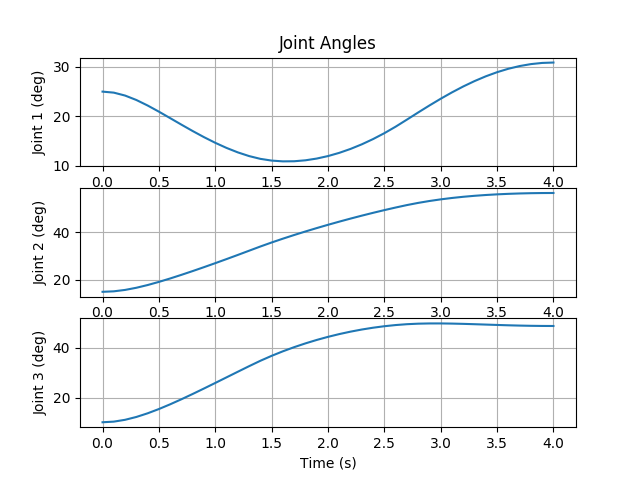

Text(0, 0.5, 'Joint 3 (deg)')

In [5]:
# Create and display joint angle time history plots for the first three joints of the planar
# four-link arm.
figure(1)
subplot(3,1,1)
plot(t,Qik[:,0]*180/pi)
grid(True)
title("Joint Angles")
xlabel('Time (s)')
ylabel('Joint 1 (deg)')
subplot(3,1,2)
plot(t,Qik[:,1]*180/pi)
grid(True)
xlabel('Time (s)')
ylabel('Joint 2 (deg)')
subplot(3,1,3)
plot(t,Qik[:,2]*180/pi)
grid(True)
xlabel('Time (s)')
ylabel('Joint 3 (deg)')

<IPython.core.display.Javascript object>


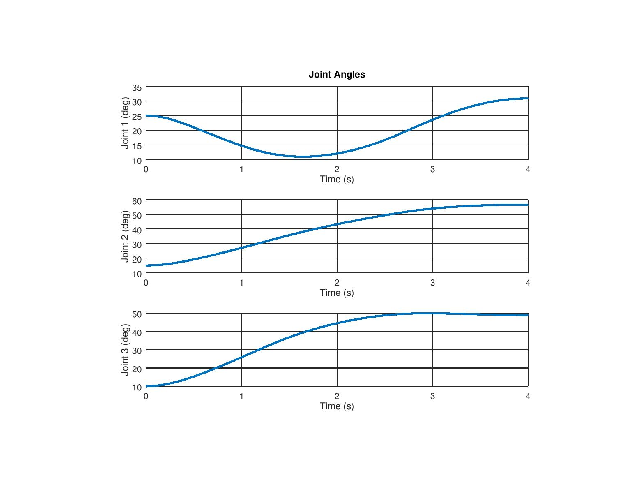

In [6]:
# Display the same joint angle time history plots created by the RTB for MATLAB Octave variant.
if os.path.isfile("./octave_ikine2d_plot.jpg"):
    figure()  # create new figure
    im  = Image.open("octave_ikine2d_plot.jpg", "r")
    imshow(im)
    axis('off')

Now use rbplot() to display an animation of the planar four-link arm over the inverse kinimatics time period. In Jupyter nbviewer this plot will only show the final pose. Note: do not close this interactive plot figure until the last cell of this notebook has been run to create the controlled animation.

<IPython.core.display.Javascript object>


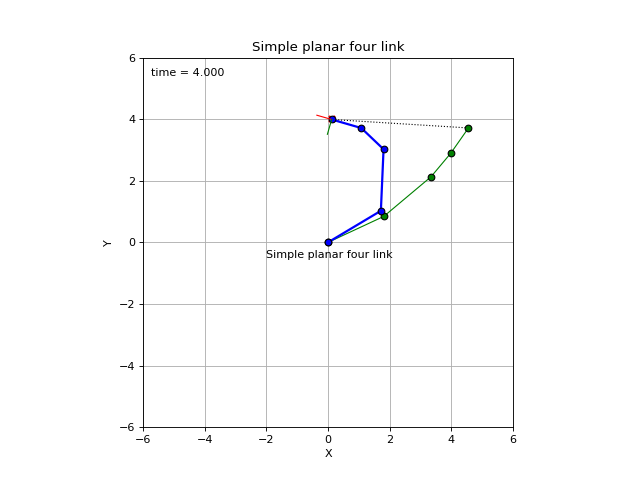

fignum = 3


In [7]:
rbplot(fl2d, Qik)          # rbplot() creates a Matplotlib animation 2D object and saves a handle to it in the 
fignum = plt.gcf().number  # rbplotAnims2D dictionary using the animator's managed figure number as keyword.
print("fignum = %d" % fignum)

<IPython.core.display.Javascript object>


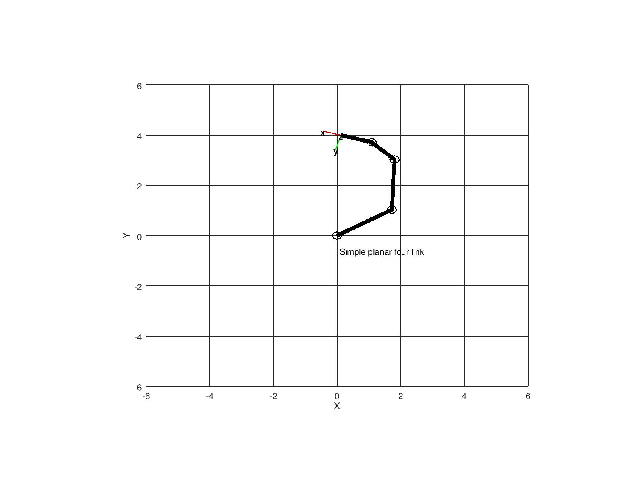

In [8]:
# Display plot of final planar four-link arm pose from animation created by the RTB for MATLAB Octave variant.
if os.path.isfile("./octave_ikine2d_anim.jpg"):
    figure()  # create new figure
    im  = Image.open("octave_ikine2d_anim.jpg", "r")
    imshow(im)
    axis('off')

In [9]:
# Display the RTB for Python rbplot() animation of the planar four-link arm as a controlled animation.
rbplotAnims2D[fignum]